In [1]:
#code to fecth Members of Parliament data from API's give on wesites https://represent.opennorth.ca and https://openparliament.ca/api.
#application that merges data and then the analysis is done
import requests                                                 #request library for making requests and working with APIs
import json                                                     #Json library takes in a Python object, and dumps it to a string
import numpy as np                                              #numpy for scientific computing
import matplotlib.pyplot as plt                                 #matplotlib is for visualizations
import pandas as pd                                             #pandas to do the data manipulation and for data analysis
from pandas.io.json import json_normalize                       #json_normalize is for converting json arrays into columns
from os import path                                             
from wordcloud import WordCloud, \
    STOPWORDS, ImageColorGenerator                              #wordcloud for making wordcloud visualizations
from nltk.corpus import stopwords                               #stopwords for the wordcloud 

#Getting Members of Parliament data from http://api.openparliament.ca
#GET request to the endpoint using the requests library
response = requests.get(
    "http://api.openparliament.ca/politicians/?format=json"
)  

#print the status code of the get request, 200 means it was successful
print(response.status_code)                                     

200


In [2]:
#print the response that we get from API
print(
    response.json()
)                                   


{'pagination': {'next_url': None, 'limit': 338, 'previous_url': None, 'offset': 0}, 'objects': [{'url': '/politicians/ziad-aboultaif/', 'image': '/media/polpics/ziad-aboultaif.jpg', 'current_riding': {'province': 'AB', 'name': {'en': 'Edmonton Manning'}}, 'name': 'Ziad Aboultaif', 'current_party': {'short_name': {'en': 'Conservative'}}}, {'url': '/politicians/john-barlow/', 'image': '/media/polpics/john-barlow.jpg', 'current_riding': {'province': 'AB', 'name': {'en': 'Foothills'}}, 'name': 'John Barlow', 'current_party': {'short_name': {'en': 'Conservative'}}}, {'url': '/politicians/bob-benzen/', 'image': '/media/polpics/bob-benzen.jpg', 'current_riding': {'province': 'AB', 'name': {'en': 'Calgary Heritage'}}, 'name': 'Bob Benzen', 'current_party': {'short_name': {'en': 'Conservative'}}}, {'url': '/politicians/randy-boissonnault/', 'image': '/media/polpics/randy-boissonnault.jpg', 'current_riding': {'province': 'AB', 'name': {'en': 'Edmonton Centre'}}, 'name': 'Randy Boissonnault', 'cu

In [3]:
#Indenting the raw json data fetched from the API
data = response.text
parsed = json.loads(data)
print(
    json.dumps(
        parsed,
        indent=4)
)

{
    "pagination": {
        "next_url": null,
        "limit": 338,
        "previous_url": null,
        "offset": 0
    },
    "objects": [
        {
            "url": "/politicians/ziad-aboultaif/",
            "image": "/media/polpics/ziad-aboultaif.jpg",
            "current_riding": {
                "province": "AB",
                "name": {
                    "en": "Edmonton Manning"
                }
            },
            "name": "Ziad Aboultaif",
            "current_party": {
                "short_name": {
                    "en": "Conservative"
                }
            }
        },
        {
            "url": "/politicians/john-barlow/",
            "image": "/media/polpics/john-barlow.jpg",
            "current_riding": {
                "province": "AB",
                "name": {
                    "en": "Foothills"
                }
            },
            "name": "John Barlow",
            "current_party": {
                "short_name": {
        

In [4]:
#Removing the pargination from the JSON to get only the objects
objects = parsed["objects"]
print(
    json.dumps(
        objects,
        indent=4)
)


[
    {
        "url": "/politicians/ziad-aboultaif/",
        "image": "/media/polpics/ziad-aboultaif.jpg",
        "current_riding": {
            "province": "AB",
            "name": {
                "en": "Edmonton Manning"
            }
        },
        "name": "Ziad Aboultaif",
        "current_party": {
            "short_name": {
                "en": "Conservative"
            }
        }
    },
    {
        "url": "/politicians/john-barlow/",
        "image": "/media/polpics/john-barlow.jpg",
        "current_riding": {
            "province": "AB",
            "name": {
                "en": "Foothills"
            }
        },
        "name": "John Barlow",
        "current_party": {
            "short_name": {
                "en": "Conservative"
            }
        }
    },
    {
        "url": "/politicians/bob-benzen/",
        "image": "/media/polpics/bob-benzen.jpg",
        "current_riding": {
            "province": "AB",
            "name": {
               

In [5]:
#creating a dataframe MP for Members of parliament from the JSON data that we got from API
MP = pd.DataFrame.from_dict(
    json_normalize(
        objects)
)
MP_Updated=MP.rename(
    columns={
        "current_party.short_name.en": "current_party",
        "current_riding.name.en": "current_district",
        "current_riding.province":"current_province",
        "image":"image",
        "name":"name",
        "url":"url"}
)

MP_Updated['elected_office'] = "MP"
MP_Updated


current_party                     current_district current_province  \
0    Conservative                     Edmonton Manning               AB   
1    Conservative                            Foothills               AB   
2    Conservative                     Calgary Heritage               AB   
3         Liberal                      Edmonton Centre               AB   
4    Conservative                     Red Deer—Lacombe               AB   
5    Conservative                  St. Albert—Edmonton               AB   
6    Conservative                   Edmonton Griesbach               AB   
7    Conservative               Red Deer—Mountain View               AB   
8             NDP                  Edmonton Strathcona               AB   
9    Conservative                           Yellowhead               AB   
10   Conservative      Sherwood Park—Fort Saskatchewan               AB   
11   Conservative                           Lethbridge               AB   
12        Liberal                       Calgary Centre               AB   
13   Conservative                   Edmonton Riverbend               AB   
14    Independent                      Calgary Skyview               AB   
15   Conservative                  Calgary Rocky Ridge               AB   
16   Conservative                      Calgary Shepard               AB   
17   Conservative                    Calgary Midnapore               AB   
18   Conservative                  Edmonton—Wetaskiwin               AB   
19   Conservative                  Calgary Signal Hill               AB   
20   Conservative              Sturgeon River—Parkland               AB   
21   Conservative                        Edmonton West               AB   
22   Conservative         Medicine Hat—Cardston—Warner               AB   
23   Conservative                    Calgary Nose Hill               AB   
24   Conservative                        Banff—Airdrie               AB   
25   Conservative                            Bow River               AB   
26        Liberal                  Edmonton Mill Woods               AB   
27   Conservative                Battle River—Crowfoot               AB   
28   Conservative                             Lakeland               AB   
29   Conservative                 Peace River—Westlock               AB   
..            ...                                  ...              ...   
304           NDP                     Salaberry—Suroît               QC   
305  Conservative                  Richmond—Arthabaska               QC   
306       Liberal                           Saint-Jean               QC   
307       Liberal                   Marc-Aurèle-Fortin               QC   
308       Liberal                       Honoré-Mercier               QC   
309       Liberal            Longueuil—Charles-LeMoyne               QC   
310           NDP     Abitibi—Baie-James—Nunavik—Eeyou               QC   
311           NDP                Saint-Hyacinthe—Bagot               QC   
312       Liberal                      Lac-Saint-Louis               QC   
313       Liberal                  Vaudreuil—Soulanges               QC   
314       Liberal                  Châteauguay—Lacolle               QC   
315          Bloc                             Joliette               QC   
316          Bloc                             Montcalm               QC   
317       Liberal                             Papineau               QC   
318           NDP                            Jonquière               QC   
319  Conservative             Cypress Hills—Grasslands               SK   
320           NDP                       Saskatoon West               SK   
321  Conservative            Carlton Trail—Eagle Creek               SK   
322  Conservative             Battlefords—Lloydminster               SK   
323       Liberal                       Regina—Wascana               SK   
324  Conservative                        Prince Albert               SK   
325           NDP  Desnethé—M

In [6]:
#Getting Candidate data from https://represent.opennorth.ca
cand_Response = requests.get(
    "https://represent.opennorth.ca/candidates/"
)
print(
    cand_Response.status_code
)


200


In [7]:
print(
    cand_Response.json()
)

{'objects': [{'email': 'tanya.hansen.pratt@manitobaliberals.ca', 'last_name': 'Pratt', 'incumbent': None, 'related': {'election_url': '/elections/legislative-assembly-of-manitoba/', 'boundary_url': '/boundaries/manitoba-electoral-districts-2018/radisson/'}, 'gender': '', 'photo_url': '', 'source_url': 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRWR5loiU8ZHl1308iT95bJmQw9XDkCabW_3Pxn1XK9z6dPLqLzgsjrPWAgOlPbNXjZtgwsesxxP3bj/pub?gid=0&single=true&output=csv', 'extra': {}, 'district_name': 'Radisson', 'election_name': 'Legislative Assembly of Manitoba', 'party_name': 'Liberal', 'url': '', 'offices': [], 'first_name': 'Tanya Hansen', 'elected_office': 'candidate', 'name': 'Tanya Hansen Pratt', 'personal_url': ''}, {'email': 'sara.campbell@greenparty.mb.ca', 'last_name': 'Campbell', 'incumbent': None, 'related': {'election_url': '/elections/legislative-assembly-of-manitoba/', 'boundary_url': '/boundaries/manitoba-electoral-districts-2018/interlake-gimli/'}, 'gender': '', 'photo_url': '

In [8]:
#Normalising JSON data
data_Cand = cand_Response.text
parsed_Cand = json.loads(data_Cand)
print(
    json.dumps(
        parsed_Cand,
        indent=4)
)

{
    "objects": [
        {
            "email": "tanya.hansen.pratt@manitobaliberals.ca",
            "last_name": "Pratt",
            "incumbent": null,
            "related": {
                "election_url": "/elections/legislative-assembly-of-manitoba/",
                "boundary_url": "/boundaries/manitoba-electoral-districts-2018/radisson/"
            },
            "gender": "",
            "photo_url": "",
            "source_url": "https://docs.google.com/spreadsheets/d/e/2PACX-1vRWR5loiU8ZHl1308iT95bJmQw9XDkCabW_3Pxn1XK9z6dPLqLzgsjrPWAgOlPbNXjZtgwsesxxP3bj/pub?gid=0&single=true&output=csv",
            "extra": {},
            "district_name": "Radisson",
            "election_name": "Legislative Assembly of Manitoba",
            "party_name": "Liberal",
            "url": "",
            "offices": [],
            "first_name": "Tanya Hansen",
            "elected_office": "candidate",
            "name": "Tanya Hansen Pratt",
            "personal_url": ""
        },
 

In [9]:
#Indenting the data
objects_Cand = parsed_Cand["objects"]
print(
    json.dumps(
        objects_Cand,
        indent=4)
)

[
    {
        "email": "tanya.hansen.pratt@manitobaliberals.ca",
        "last_name": "Pratt",
        "incumbent": null,
        "related": {
            "election_url": "/elections/legislative-assembly-of-manitoba/",
            "boundary_url": "/boundaries/manitoba-electoral-districts-2018/radisson/"
        },
        "gender": "",
        "photo_url": "",
        "source_url": "https://docs.google.com/spreadsheets/d/e/2PACX-1vRWR5loiU8ZHl1308iT95bJmQw9XDkCabW_3Pxn1XK9z6dPLqLzgsjrPWAgOlPbNXjZtgwsesxxP3bj/pub?gid=0&single=true&output=csv",
        "extra": {},
        "district_name": "Radisson",
        "election_name": "Legislative Assembly of Manitoba",
        "party_name": "Liberal",
        "url": "",
        "offices": [],
        "first_name": "Tanya Hansen",
        "elected_office": "candidate",
        "name": "Tanya Hansen Pratt",
        "personal_url": ""
    },
    {
        "email": "sara.campbell@greenparty.mb.ca",
        "last_name": "Campbell",
        "incumbe

In [10]:
#Creating Candidates dataframe
Candidates = pd.DataFrame.from_dict(
    json_normalize(
        objects_Cand
    )
)
Candidates


district_name elected_office                     election_name  \
0              Radisson      candidate  Legislative Assembly of Manitoba   
1       Interlake-Gimli      candidate  Legislative Assembly of Manitoba   
2                Roblin      candidate  Legislative Assembly of Manitoba   
3      The Pas-Kameesak      candidate  Legislative Assembly of Manitoba   
4          Spruce Woods      candidate  Legislative Assembly of Manitoba   
5            The Maples      candidate  Legislative Assembly of Manitoba   
6             Southdale      candidate  Legislative Assembly of Manitoba   
7           Beauharnois      candidate     Assemblée nationale du Québec   
8                Acadie      candidate     Assemblée nationale du Québec   
9            Saint-Jean      candidate     Assemblée nationale du Québec   
10            Verchères      candidate     Assemblée nationale du Québec   
11           Terrebonne      candidate     Assemblée nationale du Québec   
12             Rimouski      candidate     Assemblée nationale du Québec   
13             Mégantic      candidate     Assemblée nationale du Québec   
14  Vanier-Les Rivières      candidate     Assemblée nationale du Québec   
15            Richelieu      candidate     Assemblée nationale du Québec   
16              Pontiac      candidate     Assemblée nationale du Québec   
17              Agassiz      candidate  Legislative Assembly of Manitoba   
18  Kildonan-River East      candidate  Legislative Assembly of Manitoba   
19        Union Station      candidate  Legislative Assembly of Manitoba   

                                     email  \
0   tanya.hansen.pratt@manitobaliberals.ca   
1           sara.campbell@greenparty.mb.ca   
2        michael.bazak@manitobaliberals.ca   
3                pcmanitoba@pcmanitoba.com   
4                                            
5                  deepformaples@gmail.com   
6                Karen.Myshkowsky@mbndp.ca   
7                    felix.rheaume@plq.org   
8                         acadie@lacaq.net   
9                     saint-jean@lacaq.net   
10         pierre-olivier.downey@pvq.qc.ca   
11                    terrebonne@lacaq.net   
12                      rimouski@lacaq.net   
13                      megantic@laqac.net   
14              samuel.raymond.1@ulaval.ca   
15                     richelieu@pq.quebec   
16                       pontiac@lacaq.net   
17      hector.swanson@manitobaliberals.ca   
18               Elliot.Macdonald@mbndp.ca   
19        harold.davis@manitobaliberals.ca   

                                 extra.facebook  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
5                                           NaN   
6                                           NaN   
7   https://www.facebook.com/felix.rheaume.plq/   
8                                           NaN   
9                                           NaN   
10                                          NaN   
11                                          NaN   
12                                          NaN   
13                                          NaN   
14                                          NaN   
15  https://www.facebook.com/sylvain.rochon.357   
16                                          NaN   
17                                          NaN   
18                                          NaN   
19                                          NaN   

                          extra.twitter      first_name gender incumbent  \
0                                   NaN    Tanya Hansen             None   
1                                   NaN            Sara             None   
2                                   NaN         Michael             None   
3                                   NaN          Ronald             No

In [11]:
#Getting Representative data from https://represent.opennorth.ca
response_Rep = requests.get(
    "https://represent.opennorth.ca/representatives/?limit=1000"
)
print(
    response_Rep.status_code
)


200


In [13]:
print(
    response_Rep.json()
)

{'objects': [{'email': 'mayor@brookealvinston.com', 'last_name': 'Ferguson', 'gender': '', 'photo_url': 'http://www.lambtononline.ca/home/government/accessingcountycouncil/countycouncillors/PublishingImages/Lambton%20County%20Council%202019-22/Councillor%20Dave%20Ferguson%20-%20Thumbnail.jpg', 'source_url': 'http://www.lambtononline.ca/home/government/accessingcountycouncil/countycouncillors/Pages/default.aspx', 'extra': {}, 'district_name': 'Lambton', 'related': {'representative_set_url': '/representative-sets/lambton-county-council/', 'boundary_url': '/boundaries/census-divisions/3538/'}, 'party_name': '', 'url': '', 'offices': [], 'first_name': 'Dave', 'elected_office': 'Councillor', 'representative_set_name': 'Lambton County Council', 'name': 'Dave Ferguson', 'personal_url': ''}, {'email': 'bradloosley@gmail.com', 'last_name': 'Loosley', 'gender': '', 'photo_url': 'http://www.lambtononline.ca/home/government/accessingcountycouncil/countycouncillors/PublishingImages/Lambton%20County

In [14]:
#Normalising JSON data
data_Rep = response_Rep.text
parsed_Rep = json.loads(data_Rep)
print(
    json.dumps
    (
        parsed_Rep,
        indent=4
    )
)

{
    "objects": [
        {
            "email": "mayor@brookealvinston.com",
            "last_name": "Ferguson",
            "gender": "",
            "photo_url": "http://www.lambtononline.ca/home/government/accessingcountycouncil/countycouncillors/PublishingImages/Lambton%20County%20Council%202019-22/Councillor%20Dave%20Ferguson%20-%20Thumbnail.jpg",
            "source_url": "http://www.lambtononline.ca/home/government/accessingcountycouncil/countycouncillors/Pages/default.aspx",
            "extra": {},
            "district_name": "Lambton",
            "related": {
                "representative_set_url": "/representative-sets/lambton-county-council/",
                "boundary_url": "/boundaries/census-divisions/3538/"
            },
            "party_name": "",
            "url": "",
            "offices": [],
            "first_name": "Dave",
            "elected_office": "Councillor",
            "representative_set_name": "Lambton County Council",
            "name": "D

In [15]:
#Indenting the Representatives data
objects_Rep = parsed_Rep["objects"]
print(
    json.dumps(
        objects_Rep,
        indent=4
    )
)


[
    {
        "email": "mayor@brookealvinston.com",
        "last_name": "Ferguson",
        "gender": "",
        "photo_url": "http://www.lambtononline.ca/home/government/accessingcountycouncil/countycouncillors/PublishingImages/Lambton%20County%20Council%202019-22/Councillor%20Dave%20Ferguson%20-%20Thumbnail.jpg",
        "source_url": "http://www.lambtononline.ca/home/government/accessingcountycouncil/countycouncillors/Pages/default.aspx",
        "extra": {},
        "district_name": "Lambton",
        "related": {
            "representative_set_url": "/representative-sets/lambton-county-council/",
            "boundary_url": "/boundaries/census-divisions/3538/"
        },
        "party_name": "",
        "url": "",
        "offices": [],
        "first_name": "Dave",
        "elected_office": "Councillor",
        "representative_set_name": "Lambton County Council",
        "name": "Dave Ferguson",
        "personal_url": ""
    },
    {
        "email": "bradloosley@gmail.co

In [16]:
#creating Representatives dataframe from the JSON data
Representatives = pd.DataFrame.from_dict(
    json_normalize(
        objects_Rep
    )
)
Representatives


district_name elected_office  \
0                     Lambton     Councillor   
1                     Lambton     Councillor   
2                     Lambton     Councillor   
3                     Lambton     Councillor   
4                     Lambton     Councillor   
5                     Lambton     Councillor   
6                     Lambton     Councillor   
7                     Lambton     Councillor   
8                     Lambton     Councillor   
9      Lambton—Kent—Middlesex             MP   
10          Eglinton—Lawrence             MP   
11               Louis-Hébert             MP   
12       Port Moody—Coquitlam             MP   
13       Miramichi—Grand Lake             MP   
14          Calgary Nose Hill             MP   
15         Ottawa West—Nepean             MP   
16   Pitt Meadows—Maple Ridge             MP   
17                    Lambton     Councillor   
18                    Lambton     Councillor   
19                    Lambton     Councillor   
20                    Lambton         Warden   
21                     Ward 1     Councillor   
22                     Ward 1     Councillor   
23                     Ward 2     Councillor   
24                     Ward 1     Councillor   
25                     Ward 1     Councillor   
26               Wood Buffalo          Mayor   
27                     Ward 1     Councillor   
28                     Ward 3     Councillor   
29                     Ward 4     Councillor   
..                        ...            ...   
970              Montréal-Est          Maire   
971                District 5     Conseiller   
972                District 6     Conseiller   
973                District 2     Conseiller   
974                District 4     Conseiller   
975                    Ward 5     Councillor   
976                    Ward 1     Councillor   
977                    Ward 5     Councillor   
978                    Ward 7     Councillor   
979                    Ward 6     Councillor   
980                    Ward 2     Councillor   
981                    Ward 4     Councillor   
982                    Ward 6     Councillor   
983              Chatham-Kent          Mayor   
984                    Ward 1     Councillor   
985                    Ward 4     Councillor   
986                    Ward 6     Councillor   
987                    Ward 3     Councillor   
988                    Ward 3     Councillor   
989                    Ward 3     Councillor   
990                 Brantford          Mayor   
991                    Ward 2     Councillor   
992                    Ward 4     Councillor   
993                    Ward 5     Councillor   
994                    Ward 1     Councillor   
995                    Ward 4     Councillor   
996                    Ward 2     Councillor   
997                    Ward 1     Councillor   
998                    Ward 5     Councillor   
999                    Ward 3     Councillor   

                                  email extra.constituency_email  \
0             mayor@brookealvinston.com                      NaN   
1                 bradloosley@gmail.com                      NaN   
2                  mike.stark@sarnia.ca                      NaN   
3        bhand@villageofpointedward.com                      NaN   
4                 brian.white@sarnia.ca                      NaN   
5            smiller@stclairtownship.ca                      NaN   
6              mayor@dawneuphemia.on.ca                      NaN   
7                dcook@lambtonshores.ca                      NaN   
8                    d.boushy@cogeco.ca                      NaN   
9                bev.shipley@parl.gc.ca                      NaN   
10           Marco.Mendicino@parl.gc.ca                      NaN   
11           Joel.Lightbound@parl.gc.ca                      NaN   
12              fin.donnelly@parl.gc.ca                      NaN   
13              Pat.Finnigan@parl.gc.ca                      NaN   
14           Michel

In [17]:
#Creating dataframes from tables in order to analyse data
#Creating Inner join between Representative data and members of parliament
#Finding: Michael Barrett was the only person who was elected as Chair but became MP later on as he was present in MP table as well
df_Inner = pd.merge(
    MP_Updated,
    Representatives,
    on='name',
    how='inner'
)
#changing the names of the columns
df_Inner

current_party                                   current_district  \
0  Conservative                                  Calgary Nose Hill   
1           NDP                               Port Moody—Coquitlam   
2       Liberal                           Pitt Meadows—Maple Ridge   
3       Liberal                               Miramichi—Grand Lake   
4  Conservative  Leeds—Grenville—Thousand Islands and Rideau Lakes   
5       Liberal                                  Eglinton—Lawrence   
6  Conservative                             Lambton—Kent—Middlesex   
7       Liberal                                 Ottawa West—Nepean   
8       Liberal                                       Louis-Hébert   

  current_province                                image              name  \
0               AB   /media/polpics/michelle-rempel.jpg   Michelle Rempel   
1               BC      /media/polpics/fin-donnelly.jpg      Fin Donnelly   
2               BC         /media/polpics/dan-ruimy.jpg         Dan Ruimy   
3               NB      /media/polpics/pat-finnigan.jpg      Pat Finnigan   
4               ON   /media/polpics/michael-barrett.jpg   Michael Barrett   
5               ON   /media/polpics/marco-mendicino.jpg   Marco Mendicino   
6               ON       /media/polpics/bev-shipley.jpg       Bev Shipley   
7               ON  /media/polpics/anita-vandenbeld.jpg  Anita Vandenbeld   
8               QC   /media/polpics/joel-lightbound.jpg   Joël Lightbound   

                            url_x elected_office_x             district_name  \
0   /politicians/michelle-rempel/               MP         Calgary Nose Hill   
1      /politicians/fin-donnelly/               MP      Port Moody—Coquitlam   
2         /politicians/dan-ruimy/               MP  Pitt Meadows—Maple Ridge   
3      /politicians/pat-finnigan/               MP      Miramichi—Grand Lake   
4   /politicians/michael-barrett/               MP                Durham DSB   
5   /politicians/marco-mendicino/               MP         Eglinton—Lawrence   
6       /politicians/bev-shipley/               MP    Lambton—Kent—Middlesex   
7  /politicians/anita-vandenbeld/               MP        Ottawa West—Nepean   
8   /politicians/joel-lightbound/               MP              Louis-Hébert   

  elected_office_y                        email  ...   last_name  \
0               MP   Michelle.Rempel@parl.gc.ca  ...      Rempel   
1               MP      fin.donnelly@parl.gc.ca  ...    Donnelly   
2               MP         Dan.Ruimy@parl.gc.ca  ...       Ruimy   
3               MP      Pat.Finnigan@parl.gc.ca  ...    Finnigan   
4            Chair                               ...     Barrett   
5               MP   Marco.Mendicino@parl.gc.ca  ...   Mendicino   
6               MP       bev.shipley@parl.gc.ca  ...     Shipley   
7               MP  Anita.Vandenbeld@parl.gc.ca  ...  Vandenbeld   
8               MP   Joel.Lightbound@parl.gc.ca  ...  Lightbound   

                                             offices    party_name  \
0  [{'postal': 'House of Commons
Ottawa ON  K1A 0...  Conservative   
1  [{'postal': 'House of Commons
Ottawa ON  K1A 0...           NDP   
2  [{'postal': 'House of Commons
Ottawa ON  K1A 0...       Liberal   
3  [{'postal': 'House of Commons
Ottawa ON  K1A 0...       Liberal   
4  [{'type': 'legislature', 'tel': '1 647 409-524...                 
5  [{'postal': 'House of Commons
Ottawa ON  K1A 0...       Liberal   
6  [{'postal': 'House of Commons
Ottawa ON  K1A 0...  Conservative   
7  [{'postal': 'House of Commons
Ottawa ON  K1A 0...       Liberal   
8  [{'postal': 'House of Commons
Ottawa ON  K1A 0...       Liberal   

                        personal_url  \
0                                      
1              http://findonnelly.ca   
2           http://druimy.liberal.ca   
3        http://pfinnigan.liberal.ca   
4  https://www.ddsb.ca/en/index.aspx   
5         http://marcomendicinomp.ca   
6               http://bevshipley.ca   
7              http://www.a

In [18]:
#Outer join on MP's data on Representatives
merged_Data = pd.merge(
    MP_Updated,
    Representatives,
    how='outer',
    on=['name',
        'elected_office'
       ]
)
merged_Data 


current_party                 current_district current_province  \
0     Conservative                 Edmonton Manning               AB   
1     Conservative                        Foothills               AB   
2     Conservative                 Calgary Heritage               AB   
3          Liberal                  Edmonton Centre               AB   
4     Conservative                 Red Deer—Lacombe               AB   
5     Conservative              St. Albert—Edmonton               AB   
6     Conservative               Edmonton Griesbach               AB   
7     Conservative           Red Deer—Mountain View               AB   
8              NDP              Edmonton Strathcona               AB   
9     Conservative                       Yellowhead               AB   
10    Conservative  Sherwood Park—Fort Saskatchewan               AB   
11    Conservative                       Lethbridge               AB   
12         Liberal                   Calgary Centre               AB   
13    Conservative               Edmonton Riverbend               AB   
14     Independent                  Calgary Skyview               AB   
15    Conservative              Calgary Rocky Ridge               AB   
16    Conservative                  Calgary Shepard               AB   
17    Conservative                Calgary Midnapore               AB   
18    Conservative              Edmonton—Wetaskiwin               AB   
19    Conservative              Calgary Signal Hill               AB   
20    Conservative          Sturgeon River—Parkland               AB   
21    Conservative                    Edmonton West               AB   
22    Conservative     Medicine Hat—Cardston—Warner               AB   
23    Conservative                Calgary Nose Hill               AB   
24    Conservative                    Banff—Airdrie               AB   
25    Conservative                        Bow River               AB   
26         Liberal              Edmonton Mill Woods               AB   
27    Conservative            Battle River—Crowfoot               AB   
28    Conservative                         Lakeland               AB   
29    Conservative             Peace River—Westlock               AB   
...            ...                              ...              ...   
1296           NaN                              NaN              NaN   
1297           NaN                              NaN              NaN   
1298           NaN                              NaN              NaN   
1299           NaN                              NaN              NaN   
1300           NaN                              NaN              NaN   
1301           NaN                              NaN              NaN   
1302           NaN                              NaN              NaN   
1303           NaN                              NaN              NaN   
1304           NaN                              NaN              NaN   
1305           NaN                              NaN              NaN   
1306           NaN                              NaN              NaN   
1307           NaN                              NaN              NaN   
1308           NaN                              NaN              NaN   
1309           NaN                              NaN              NaN   
1310           NaN                              NaN              NaN   
1311           NaN                              NaN              NaN   
1312           NaN                              NaN              NaN   
1313           NaN                              NaN              NaN   
1314           NaN                              NaN              NaN   
1315           NaN                              NaN              NaN   
1316           NaN                              NaN              NaN   
1317           NaN                              NaN              NaN   
1318           NaN                              NaN              NaN   
1319           NaN                           

In [19]:
#selected two columns from the dataframe for analysis
MP_updated_= merged_Data[
    ["name",
     "elected_office"
    ]
]
MP_updated_


name elected_office
0         Ziad Aboultaif             MP
1            John Barlow             MP
2             Bob Benzen             MP
3     Randy Boissonnault             MP
4         Blaine Calkins             MP
5         Michael Cooper             MP
6           Kerry Diotte             MP
7          Earl Dreeshen             MP
8           Linda Duncan             MP
9           Jim Eglinski             MP
10        Garnett Genuis             MP
11        Rachael Harder             MP
12             Kent Hehr             MP
13         Matt Jeneroux             MP
14    Darshan Singh Kang             MP
15             Pat Kelly             MP
16             Tom Kmiec             MP
17       Stephanie Kusie             MP
18             Mike Lake             MP
19           Ron Liepert             MP
20            Dane Lloyd             MP
21        Kelly McCauley             MP
22             Glen Motz             MP
23       Michelle Rempel             MP
24        Blake Richards             MP
25        Martin Shields             MP
26         Amarjeet Sohi             MP
27        Kevin Sorenson             MP
28        Shannon Stubbs             MP
29        Arnold Viersen             MP
...                  ...            ...
1296        Robert Coutu          Maire
1297      Michel Bélisle     Conseiller
1298     Anne St-Laurent     Conseiller
1299           Yan Major     Conseiller
1300           John Judd     Conseiller
1301       Michael Bondy     Councillor
1302       Michael Bondy     Councillor
1303        Mark Authier     Councillor
1304     Carmen McGregor     Councillor
1305     Carmen McGregor     Councillor
1306      Dipika Damerla     Councillor
1307     Trevor Thompson     Councillor
1308     Trevor Thompson     Councillor
1309            Joe Faas     Councillor
1310            Joe Faas     Councillor
1311      Douglas Sulman     Councillor
1312        Mark Authier          Mayor
1313      Brock McGregor     Councillor
1314  Steve Pinsonneault     Councillor
1315        Dan McCreary     Councillor
1316         Chris Friel          Mayor
1317          John Sless     Councillor
1318   Richard Carpenter     Councillor
1319       David Neumann     Councillor
1320         Larry Kings     Councillor
1321      Cheryl Antoski     Councillor
1322          John Utley     Councillor
1323         Rick Weaver     Councillor
1324   Brian Van Tilborg     Councillor
1325         Greg Martin     Councillor

[1326 rows x 2 columns]

In [20]:
#Grouping the records on the basis of elected office 
MP_Rep_group = MP_updated_.groupby(
    ["elected_office"],
    as_index=False
)  #as_index: to avoid groupby to set the column ID as index

MP_Rep= MP_Rep_group.count()

#Sorting the records in descending order for better analysis
MP_Rep_Sorted=MP_Rep.sort_values(
    by='name',
    ascending=False
)
MP_Rep_Sorted

elected_office  name
2            Councillor   367
5                    MP   334
11              Trustee   268
6                   MPP   123
0                 Chair    92
8                 Mayor    55
4                   MLA    47
1            Conseiller    29
10  Regional Councillor     5
7                 Maire     3
3            Lord Mayor     1
9        Regional Chair     1
12               Warden     1

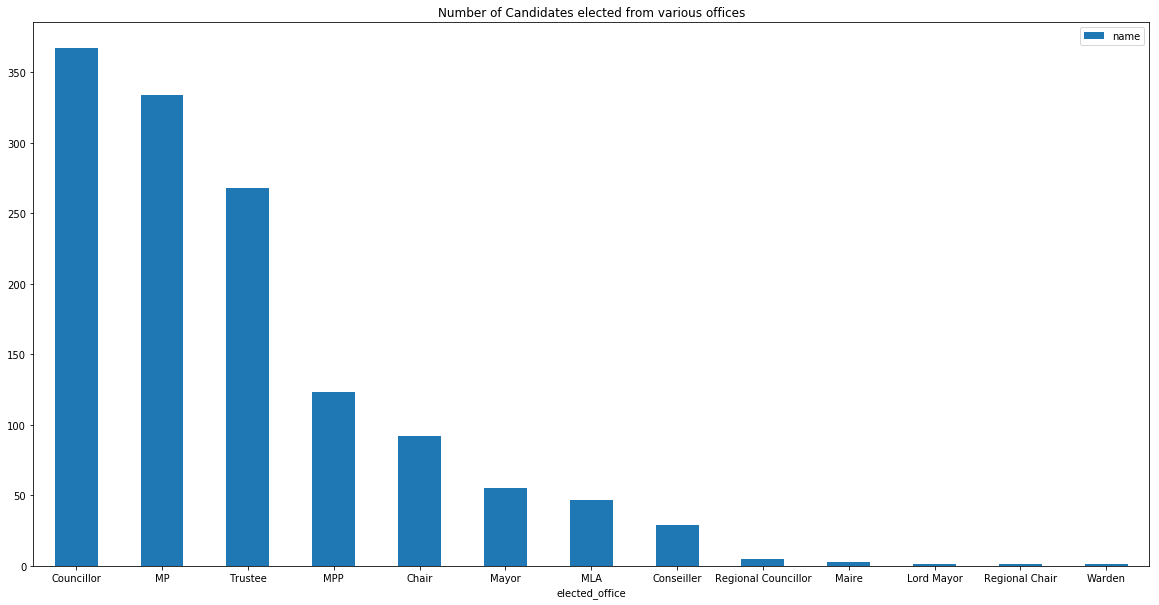

In [21]:
#Bar chart on the number of Candidates elected for various offices
#Finding: 
Bar_chart = MP_Rep_Sorted.plot.bar(
    x='elected_office',
    y='name',
    rot=0,
    figsize=(20, 10),
    title ="Number of Candidates elected from various offices"
)

In [22]:
#Grouping current party data according to the provinces from Members of Parliament dataframe
MP_Group_Party = MP_Updated.groupby("current_province")
MP_New= MP_Group_Party.count()
MP_New

current_party  current_district  image  name  url  \
current_province                                                      
AB                           33                33     33    33   33   
BC                           41                41     40    41   41   
MB                           14                14     14    14   14   
NB                           10                10     10    10   10   
NL                            7                 7      7     7    7   
NS                           10                10     10    10   10   
NT                            1                 1      1     1    1   
NU                            1                 1      1     1    1   
ON                          121               121    121   121  121   
PE                            4                 4      4     4    4   
QC                           77                77     76    77   77   
SK                           14                14     14    14   14   
YT                            1                 1      1     1    1   

                  elected_office  
current_province                  
AB                            33  
BC                            41  
MB                            14  
NB                            10  
NL                             7  
NS                            10  
NT                             1  
NU                             1  
ON                           121  
PE                             4  
QC                            77  
SK                            14  
YT                             1

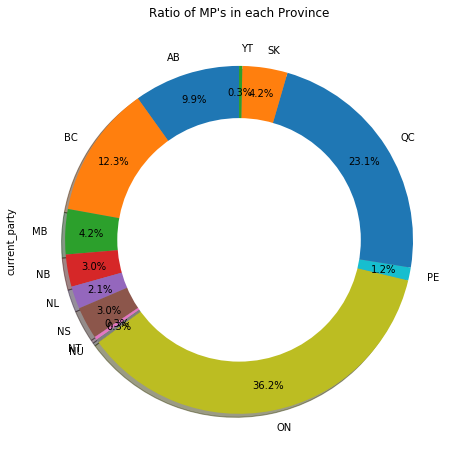

In [23]:
#Number of parties present in Canada according to the provinces
#Pctdistance is to align the position of values on donut chart
#shadow gives the shadow to the donut chart
#figsize maintains the size of donut chart
#autopct sets the decimal place of the values 
plot = MP_New.plot.pie(
    y='current_party',
    figsize=(8, 8),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.85
)

#draw circle
plot.set_title("Ratio of MP's in each Province")                          #setting the title for chart
centre_circle = plt.Circle(
    (0,0),0.70,
    fc='white'
)                         
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plot.get_legend().remove()                                                #removing legend from the donut chart


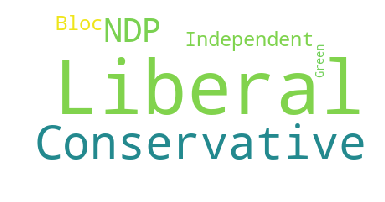

In [24]:
#Wordplot for the Party that has maximum Members of Parliament which is Liberal party
wordcloud_Party = WordCloud(
    max_font_size=90,
    max_words=100,
    background_color="white"
).generate(
    ' '.join(
    MP_Updated
    ['current_party']
)
          )
# Generate plot
plt.imshow(wordcloud_Party)
plt.axis("off")
plt.show()

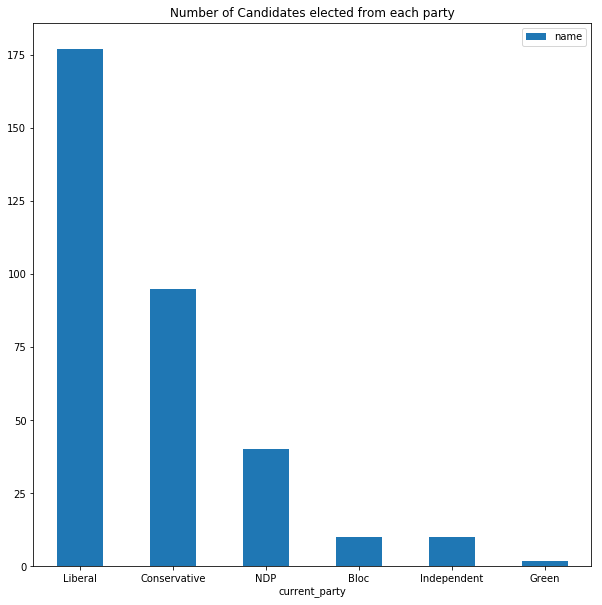

In [25]:
#Number of people elected from each party 
#Finding: Maximum number of candidates selected till date is from Liberal pary i.e. more than 175
#selected two columns from the dataframe for analysis
MP_Party= merged_Data[
    ["name",
     "current_party"
    ]
]
MP_Party
#Grouping the records on the basis of elected office 
MP_Party_Group = MP_Party.groupby(
    ["current_party"],
    as_index=False
)
MP_Party_= MP_Party_Group.count()

#Sorting the records in descending order for better analysis
MP_Party_Sorted=MP_Party_.sort_values(
    by='name',
    ascending=False
)
MP_Party_Sorted
Bar_chart = MP_Party_Sorted.plot.bar(
    x='current_party',
    y='name',
    rot=0,
    figsize=(10, 10),
    title ="Number of Candidates elected from each party"
)